In [0]:
import os
import random
from matplotlib import image
from matplotlib import pyplot
from skimage import color
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load and Process data

In [0]:
path = "drive/My Drive/School/Illinois/2019/stat542/group-project/542"

In [0]:
label_map = {'benign': 0, 'malignant': 1}

In [0]:
def image_to_array(image_path):
  size = (32,32)
  image_data = io.imread(image_path)
  return np.array(resize(image_data, size, anti_aliasing=True))

In [0]:
def load_images(images_path):
  label_images = {}
  labels = os.listdir(images_path)
  for label in labels:
    images = os.listdir(f"{images_path}/{label}")
    label_images[label] = [image_to_array(f"{images_path}/{label}/{image}") for image in  tqdm(images)]
    
  return label_images

In [0]:
def show_sample(images):
  samples_images = []
  for label in images:
    image = images[label][0]
    pyplot.figure()
    pyplot.title(label)
    pyplot.imshow(image)

  pyplot.show()

In [0]:
def prepare_images_for_training(images):
  x = []
  y = []
  for label in images:
    for image in images[label]:
      x.append(image.reshape(-1))
      y.append(label_map[label])
  
  return np.array(x),np.array(y)

In [0]:
images = load_images(path)

100%|██████████| 150/150 [18:39<00:00, 42.42s/it]


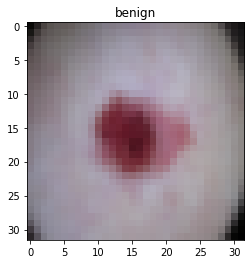

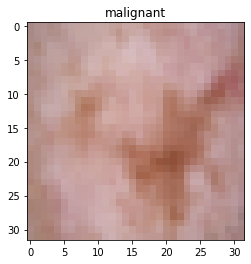

In [0]:
show_sample(images)

In [0]:
x, y = prepare_images_for_training(images)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=11)

## Train model 1: Support Vector Machine

In [0]:
clf = SVC(gamma='scale').fit(X_train, y_train)

### Accuracy results

In [0]:
clf.score(X_test, y_test)

0.6565656565656566

In [0]:
y_pred = clf.predict(X_test)

In [0]:
confusion_matrix(y_test, y_pred)

array([[37, 14],
       [20, 28]])

In [0]:
accuracy_score(y_test, y_pred)

0.6565656565656566

### Let's try to find the best set of parameters with cross validation

In [0]:
clf = SVC()

In [0]:
search = GridSearchCV(clf, param_grid, cv=10, verbose=2, n_jobs=-1).fit(x, y)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.1s finished


In [0]:
search.best_score_

0.6333333333333333

In [0]:
search.best_params_

{'kernel': 'linear'}

## Train model 2: Logistic Model

In [0]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
clf.score(X_test, y_test)

0.7272727272727273

In [0]:
y_pred = clf.predict(X_test)

In [0]:
confusion_matrix(y_test, y_pred)

array([[41, 10],
       [17, 31]])

### Let's try to find the best set of parameters with cross validation

In [0]:
clf = LogisticRegression(random_state=0)

In [0]:
param_grid = {'penalty': ['l1', 'l2']}

In [0]:
search = GridSearchCV(clf, param_grid, cv=10, verbose=2, n_jobs=-1).fit(x, y)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
search.best_score_

0.69

In [0]:
search.best_params_

{'penalty': 'l1'}

## Train model 3: Tree

In [0]:
clf = GradientBoostingClassifier().fit(X_train, y_train)

In [0]:
clf.score(X_test, y_test)

0.6868686868686869

In [0]:
y_pred = clf.predict(X_test)

In [0]:
confusion_matrix(y_test, y_pred)

array([[36, 15],
       [16, 32]])

### Let's try to find the best set of parameters with cross validation

In [0]:
clf = GradientBoostingClassifier()

In [0]:
param_grid = {'learning_rate': [.25, .5, 1], 'n_estimators': [100, 200, 300], 'max_depth': [3,4,5]}

In [0]:
search = GridSearchCV(clf, param_grid, cv=4, verbose=3, n_jobs=-1).fit(x, y)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  4.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
search.best_score_

0.69

In [0]:
search.best_params_

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}